## Calcul RMSE

In [1]:
import numpy as np
#import tensorflow as tf
#from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters


#!pip install wget 
import wget
#wget.download('https://raw.githubusercontent.com/BorisMuzellec/MissingDataOT/master/utils.py')

import numpy as np
import pandas as pd
from utils import *
import torch
import seaborn as sns

from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

In [2]:
import os
directory = 'ImputedData'
index_col = 'date'
maskes={}
X=pd.read_csv("X_selected.csv", sep=",", encoding = "ISO-8859-1", index_col=index_col).values
for filename in os.listdir(directory):    
    if filename != "A_DataComplet.csv":
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            x = filename
            if x[-9:-4].find("C"):
                p=x[-9:-4]            
            else:
                p=x[-10:-4]
            # print(p)   
            p=p+'.csv'
            mask=pd.read_csv('./BDD_missingData/mask'+p, sep=",", encoding = "ISO-8859-1", index_col=index_col)
            # mask = statMissingData(mask)
            # print(mask.head())
            maskes.update({'mask'+p:mask})
            
       
        #print(f)

In [39]:
import numpy as np
def statMissingData(mask):
    marges={}
    append = False
    margeE =[]
    merge =[]
    for col in mask.columns:
        marge = []
        count= 0
        for value in mask[col]:
            if value !=0:
                count =count+1
                append = True
            else :
                if append:
                    marge.append(count)
                    count =0
                    append = False 
        # print(marge)
        if marge !=[]:
            margeE=[np.mean(marge),np.max(marge),np.std(marge)]
        else:
            margeE=[np.nan,np.nan,np.nan]
            # print(margeE)
        dicttemp={col:margeE}
        marges.update(dicttemp)
        marge = []
    return marges        

        

## Par mask

In [79]:
print("mask;variable;mean;maximum;std")
m=maskes["maskMAR05.csv"]
for key, value in statMissingData(m).items():
    print("MAR05;",key,";",value[0],";",value[1],";",value[2])

mask;variable;mean;maximum;std
MAR05; co2_100 ; 1.0700808625336926 ; 4 ; 0.2883383206789248
MAR05; temperature_100 ; 1.0699241786015163 ; 3 ; 0.26474430635487606
MAR05; co2_101 ; nan ; nan ; nan
MAR05; temperature_101 ; 1.0725524475524475 ; 3 ; 0.2693201536301213
MAR05; co2_102 ; 1.078830823737821 ; 4 ; 0.2915765410016291
MAR05; temperature_105 ; 1.508034610630408 ; 42 ; 2.384073073350321
MAR05; co2_106 ; 1.5 ; 22 ; 1.7655013661539958
MAR05; light_106 ; 1.0629722921914357 ; 3 ; 0.2722501289871812
MAR05; co2_107 ; 1.5077844311377246 ; 28 ; 2.085220131172302
MAR05; co2_108 ; 1.0795159896283493 ; 3 ; 0.30079774221823624
MAR05; sound_108 ; 1.4857142857142858 ; 44 ; 2.202507242755899
MAR05; humidity_110 ; 1.4616336633663367 ; 18 ; 1.7294803501743101
MAR05; weather_out ; 1.081151832460733 ; 4 ; 0.30620813220403076
MAR05; weather_hum ; 1.4608076009501187 ; 30 ; 1.8923544920423014
MAR05; weather_bar_ ; 1.065743944636678 ; 3 ; 0.2614232078550049
MAR05; windows ; 1.062555853440572 ; 3 ; 0.249433

## Pour tous les masks

In [78]:
print("mask;variable;mean;maximum;std")
for key_,m in maskes.items():
    for key, value in statMissingData(m).items():
        print(key_[4:-4],";",key,";",value[0],";",value[1],";",value[2])
        

mask;variable;mean;maximum;std
MAR05 ; co2_100 ; 1.0700808625336926 ; 4 ; 0.2883383206789248
MAR05 ; temperature_100 ; 1.0699241786015163 ; 3 ; 0.26474430635487606
MAR05 ; co2_101 ; nan ; nan ; nan
MAR05 ; temperature_101 ; 1.0725524475524475 ; 3 ; 0.2693201536301213
MAR05 ; co2_102 ; 1.078830823737821 ; 4 ; 0.2915765410016291
MAR05 ; temperature_105 ; 1.508034610630408 ; 42 ; 2.384073073350321
MAR05 ; co2_106 ; 1.5 ; 22 ; 1.7655013661539958
MAR05 ; light_106 ; 1.0629722921914357 ; 3 ; 0.2722501289871812
MAR05 ; co2_107 ; 1.5077844311377246 ; 28 ; 2.085220131172302
MAR05 ; co2_108 ; 1.0795159896283493 ; 3 ; 0.30079774221823624
MAR05 ; sound_108 ; 1.4857142857142858 ; 44 ; 2.202507242755899
MAR05 ; humidity_110 ; 1.4616336633663367 ; 18 ; 1.7294803501743101
MAR05 ; weather_out ; 1.081151832460733 ; 4 ; 0.30620813220403076
MAR05 ; weather_hum ; 1.4608076009501187 ; 30 ; 1.8923544920423014
MAR05 ; weather_bar_ ; 1.065743944636678 ; 3 ; 0.2614232078550049
MAR05 ; windows ; 1.06255585344057

In [10]:
maskMAR60 =maskes["maskMAR60.csv"]
# maskMAR10 =statMissingData(maskes["maskMAR10.csv"])
mask = maskMAR60.copy()
print("MAR10")
print("Variable;mean;max;std")
a_list =[]
for col in mask.columns:
    a_list =statMissingData(mask)[col]
    print(col,";", np.mean(a_list),";",  np.max(a_list), ";", np.std(a_list))
   

MAR10
Variable;mean;max;std
co2_100 ; 3.0351430976430978 ; 67 ; 4.063136277618497
temperature_100 ; 3.257787810383747 ; 24 ; 2.8751133580769856
co2_101 ; 3.2627539503386003 ; 27 ; 2.9400386355858004
temperature_101 ; 3.0361828184511213 ; 67 ; 4.039552983539498
co2_102 ; 0.0 ; 0 ; 0.0
temperature_105 ; 2.970954356846473 ; 63 ; 3.892058453596947
co2_106 ; 3.2379991027366533 ; 25 ; 2.8310621997764787
light_106 ; 3.015790567213796 ; 58 ; 3.855611314343166
co2_107 ; 2.9587843463780183 ; 63 ; 3.804053649395846
co2_108 ; 3.187736900780379 ; 23 ; 2.774623239342492
sound_108 ; 3.209995517705065 ; 24 ; 2.8397445845047744
humidity_110 ; 3.245879431022804 ; 25 ; 2.9908884474414363
weather_out ; 3.2632056223078667 ; 25 ; 2.7602539923222946
weather_hum ; 3.038227263180004 ; 65 ; 4.022595355730736
weather_bar_ ; 3.245329732162953 ; 22 ; 2.818885483782998
windows ; 3.222868650704856 ; 24 ; 2.82732023715129


In [49]:
data = pd.read_csv('./BDD_missingData/MAR60.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col) 

<AxesSubplot:>

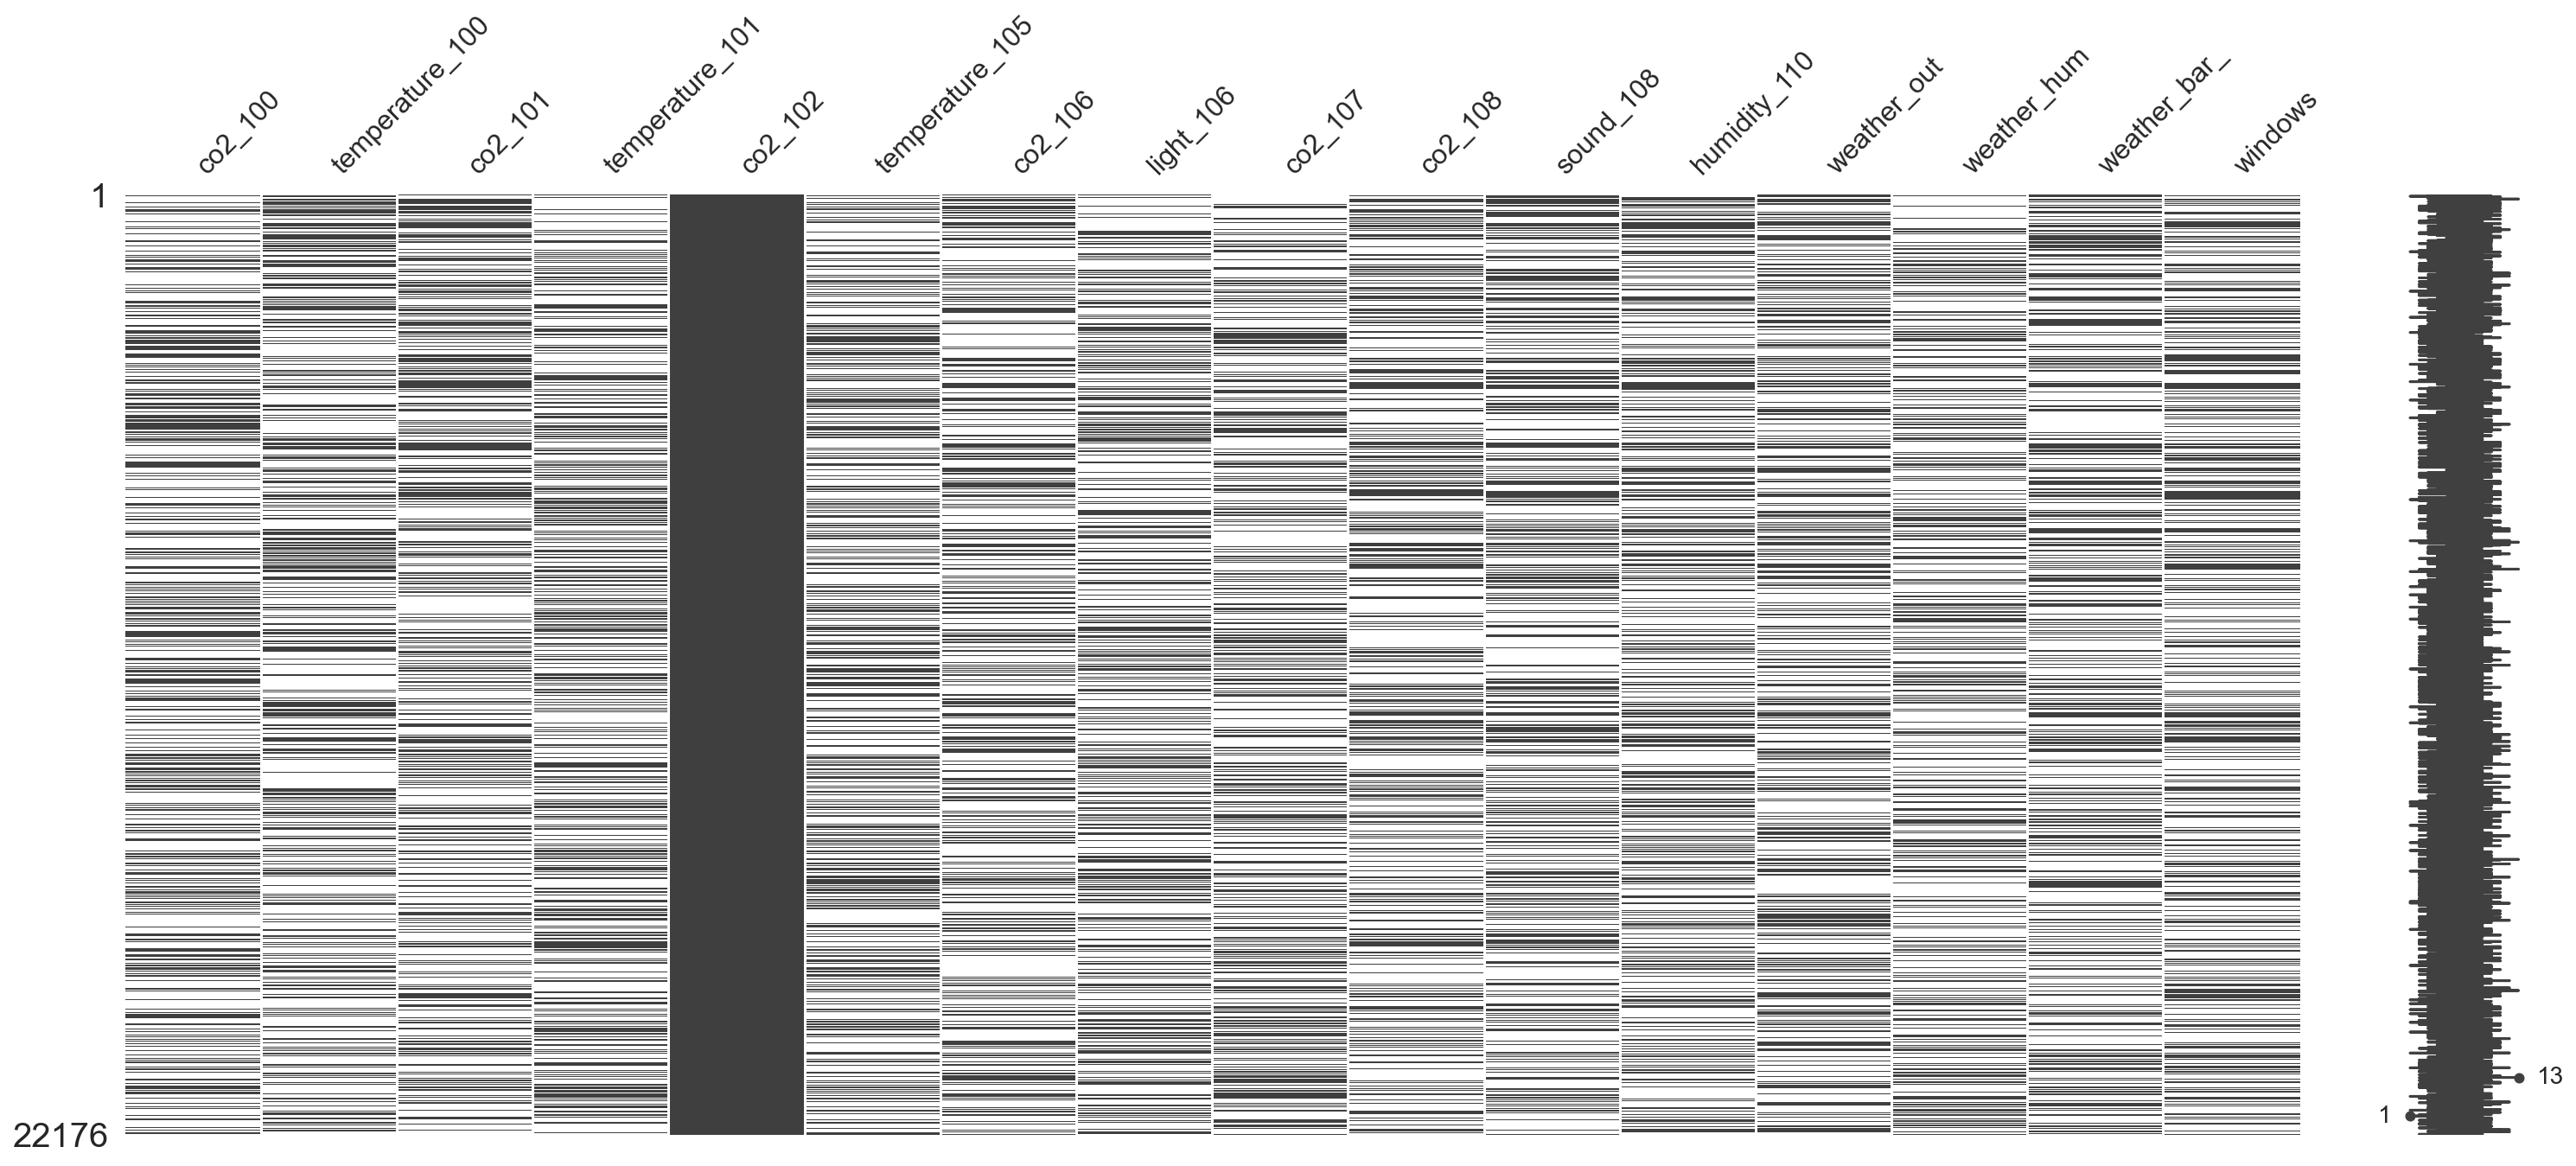

In [50]:
#!pip install missingno
import missingno as msno
msno.matrix(data)

In [32]:
data = pd.read_csv('A_DataComplet.csv', sep=",", encoding = "ISO-8859-1", index_col=index_col) 
data.index=pd.DatetimeIndex(data.index)

In [29]:
period = "5H"
df = data.resample(period).max()-data.resample(period).min()
df = data.resample(period).std()
df.max()

co2_100            560.000074
temperature_100      2.326938
co2_101            566.559730
temperature_101      4.560794
co2_102            539.098176
temperature_105      3.178622
co2_106            533.218777
light_106          237.445269
co2_107            541.942788
co2_108            522.261126
sound_108            6.377118
humidity_110        17.170501
weather_out          3.274487
weather_hum         14.434060
weather_bar_         3.411709
windows              1.204863
dtype: float64

In [36]:
data.describe().loc["std",:]

co2_100            200.205131
temperature_100      1.172363
co2_101            200.098152
temperature_101      1.312799
co2_102            205.895868
temperature_105      1.230370
co2_106            205.117053
light_106          175.499449
co2_107            212.363952
co2_108            217.167916
sound_108            2.242289
humidity_110        15.411815
weather_out          5.422665
weather_hum         17.314941
weather_bar_         8.080123
windows              0.731636
Name: std, dtype: float64

In [37]:
data.describe()

,co2_100,temperature_100,co2_101,temperature_101,co2_102,temperature_105,co2_106,light_106,co2_107,co2_108,sound_108,humidity_110,weather_out,weather_hum,weather_bar_,windows
count,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000
mean,482.433613,25.463602,464.332062,25.098685,491.260447,25.241937,494.614281,162.695393,497.486213,495.289546,6.485553,13.607830,13.913693,66.853851,1018.754994,0.895337
std,200.205131,1.172363,200.098152,1.312799,205.895868,1.230370,205.117053,175.499449,212.363952,217.167916,2.242289,15.411815,5.422665,17.314941,8.080123,0.731636
min,353.200000,18.900000,262.000000,13.152500,317.500000,0.000000,334.333333,0.000000,355.250000,296.333333,1.000000,0.000000,-1.200000,20.000000,993.500000,0.000000
25%,394.400000,24.667500,387.600000,24.282375,404.250000,24.355000,407.000000,0.000000,400.400000,387.000000,4.750000,0.000000,10.300000,53.000000,1014.200000,0.000000
50%,413.666667,25.220000,407.902682,24.842000,423.000000,24.913431,430.750000,89.291667,419.750000,427.633333,6.250000,0.000000,13.700000,69.000000,1020.000000,1.000000
75%,459.850000,26.058500,445.000000,25.770000,464.600000,25.997500,473.750000,316.000000,505.000000,504.250000,8.000000,28.613750,17.600000,81.000000,1025.000000,1.000000
max,2514.200000,30.835000,2564.800000,31.012500,2502.500000,30.907500,2661.500000,615.750000,2669.000000,2568.200000,58.000000,49.518000,30.400000,97.000000,1037.200000,4.000000
